                                      Iris Flower Classification

## Iris dataset description:

**Iris Dataset Overview:**

The Iris dataset is a classic dataset used in machine learning and analysis. It includes measurements of four features from three iris flower species: Iris setosa, Iris versicolor, and Iris virginica.

**Features:**
1. Sepal Length (cm)
2. Sepal Width (cm)
3. Petal Length (cm)
4. Petal Width (cm)

**Species:**
1. Iris setosa
2. Iris versicolor
3. Iris virginica

**Dataset Summary:**
- Samples: 150
- Features: 4
- Feature Types: Floating-point numbers (cm)
- Species: 3

# Import necessary modules/libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Reading the data

In [2]:
df=pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Data information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### Data Descriptive Stats

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


 ### Finding the shape (rows,columns) of the dataframe

In [5]:
print("shape (rows,columns) of the dataframe :",df.shape)

shape (rows,columns) of the dataframe : (150, 6)


### Correlation betweem the features

In [6]:
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


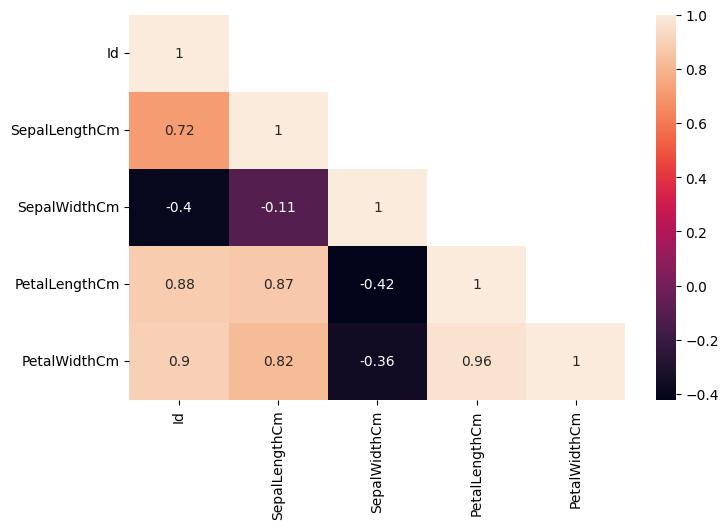

In [7]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(),annot=True,mask=np.triu(df.corr(),+1))
plt.show()

# Finding the missing values using heatmap

<AxesSubplot: >

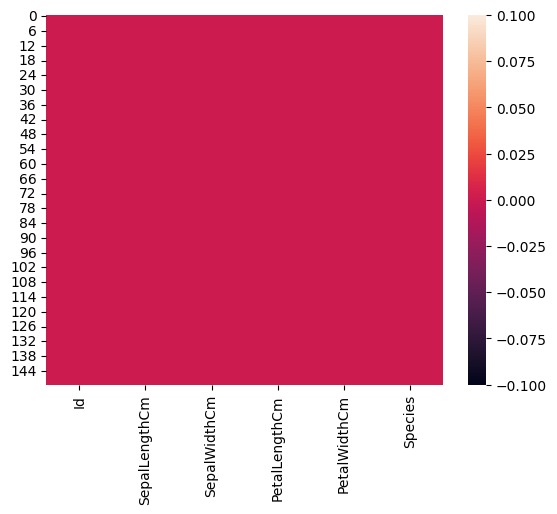

In [8]:
sns.heatmap(df.isnull())

# Outliers

### Checking the outliers using the visualization (Boxplot).

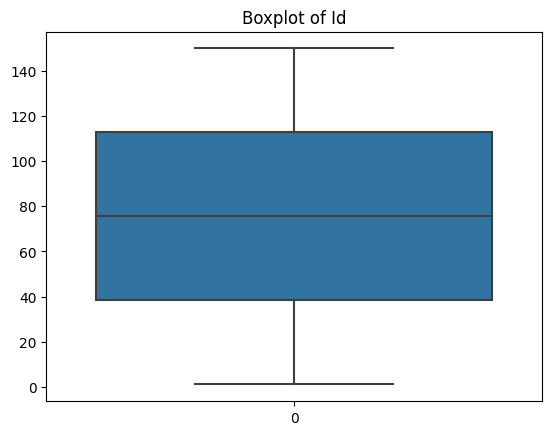

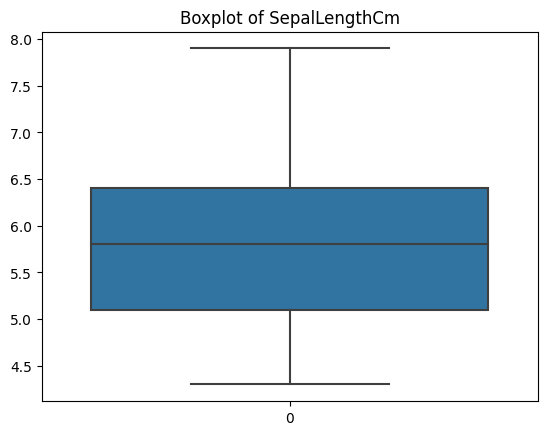

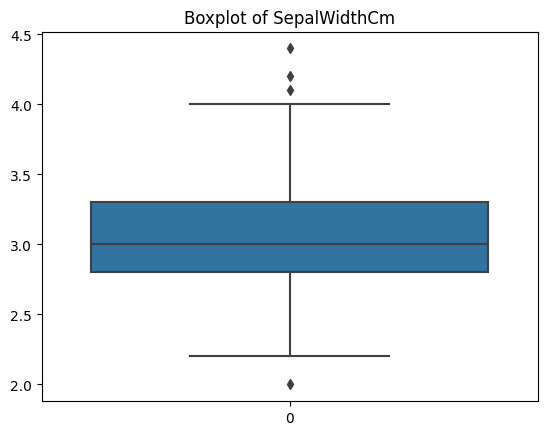

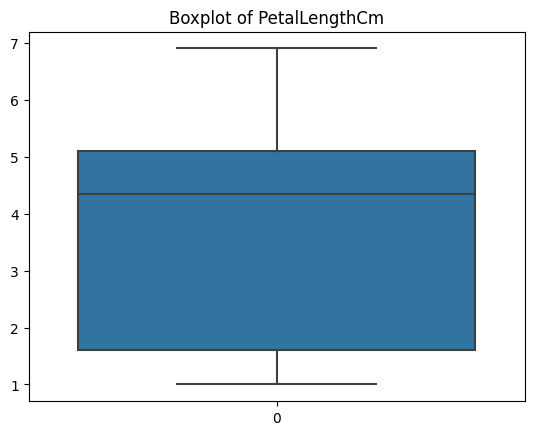

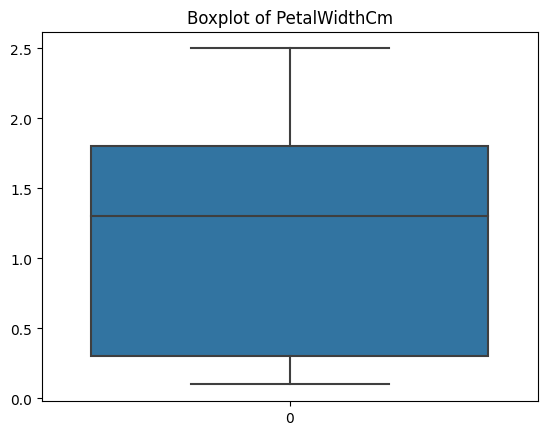

In [9]:
for col in df.select_dtypes(exclude='object').columns:
    sns.boxplot(df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

### Outliers Detection

In [10]:
def outliers(col):
    Q1=np.quantile(col,.25)
    Q3=np.quantile(col,.75)
    IQR=Q3-Q1
    lr=Q1-(1.5*IQR)
    ur=Q3+(1.5*IQR)
    return lr,ur
    

### Treatment of outliers

In [11]:
for col in df.select_dtypes(exclude='object').columns:
    lr,ur=outliers(df[col])
    df[col]=np.where(df[col]>ur,ur,df[col])
    df[col]=np.where(df[col]<lr,lr,df[col])

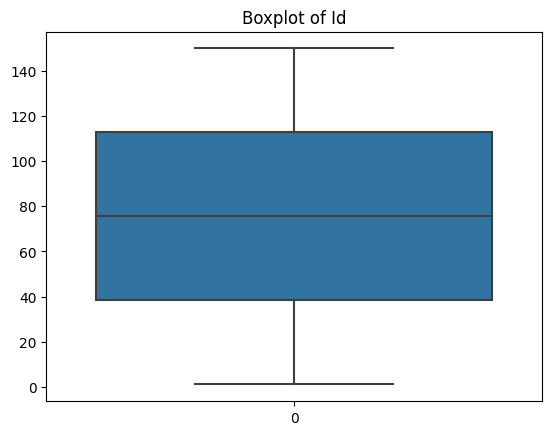

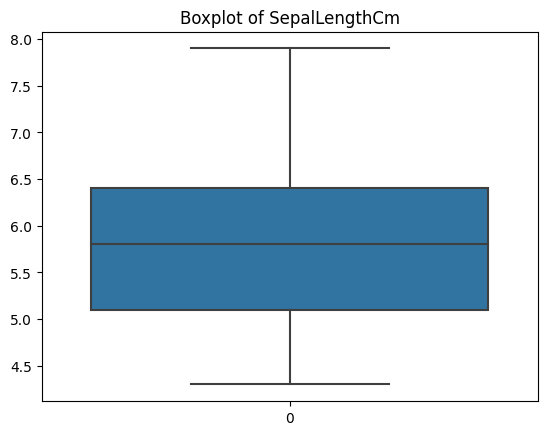

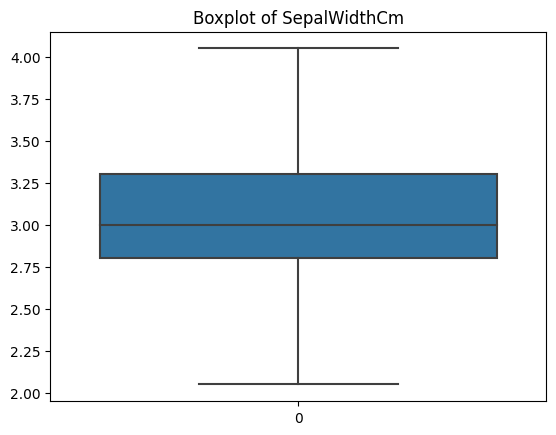

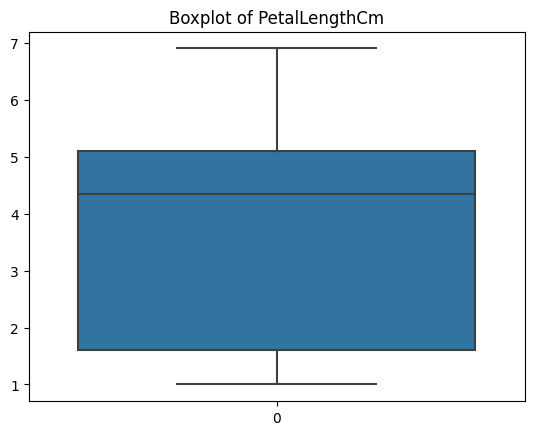

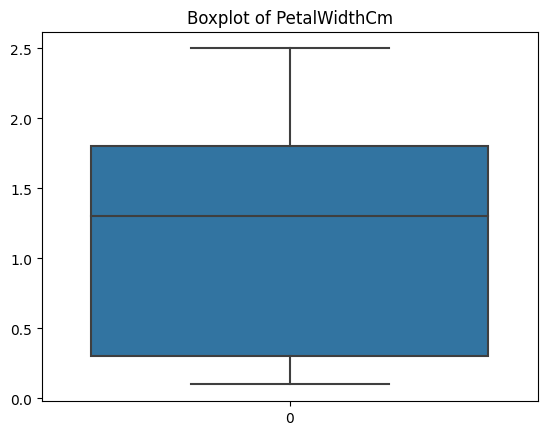

In [12]:
for col in df.select_dtypes(exclude='object').columns:
    sns.boxplot(df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# Count the types of Species 

<AxesSubplot: xlabel='Species', ylabel='count'>

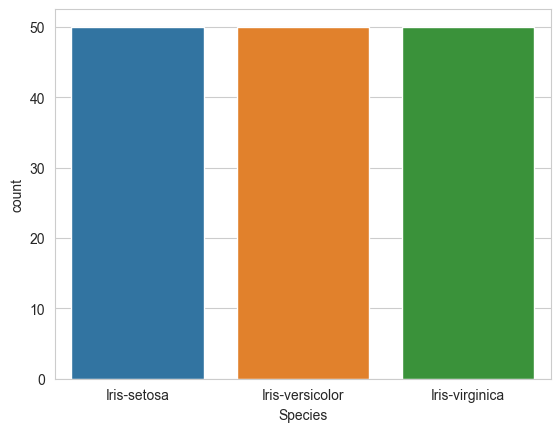

In [13]:
sns.set_style('whitegrid')
sns.countplot(x='Species',data=df)

In [14]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [15]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [16]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

# Using LabelEncoder we convert categorical data into numerical data

In [17]:
 le=LabelEncoder()

In [18]:
df.drop('Id',axis=1,inplace=True)
df.head(100)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,Iris-versicolor
96,5.7,2.9,4.2,1.3,Iris-versicolor
97,6.2,2.9,4.3,1.3,Iris-versicolor
98,5.1,2.5,3.0,1.1,Iris-versicolor


In [19]:
dfle=df
dfle.Species=le.fit_transform(dfle.Species)
dfle.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [20]:
df['Species'].unique()

array([0, 1, 2])

#### EDA-Pairplot

<Figure size 1600x900 with 0 Axes>

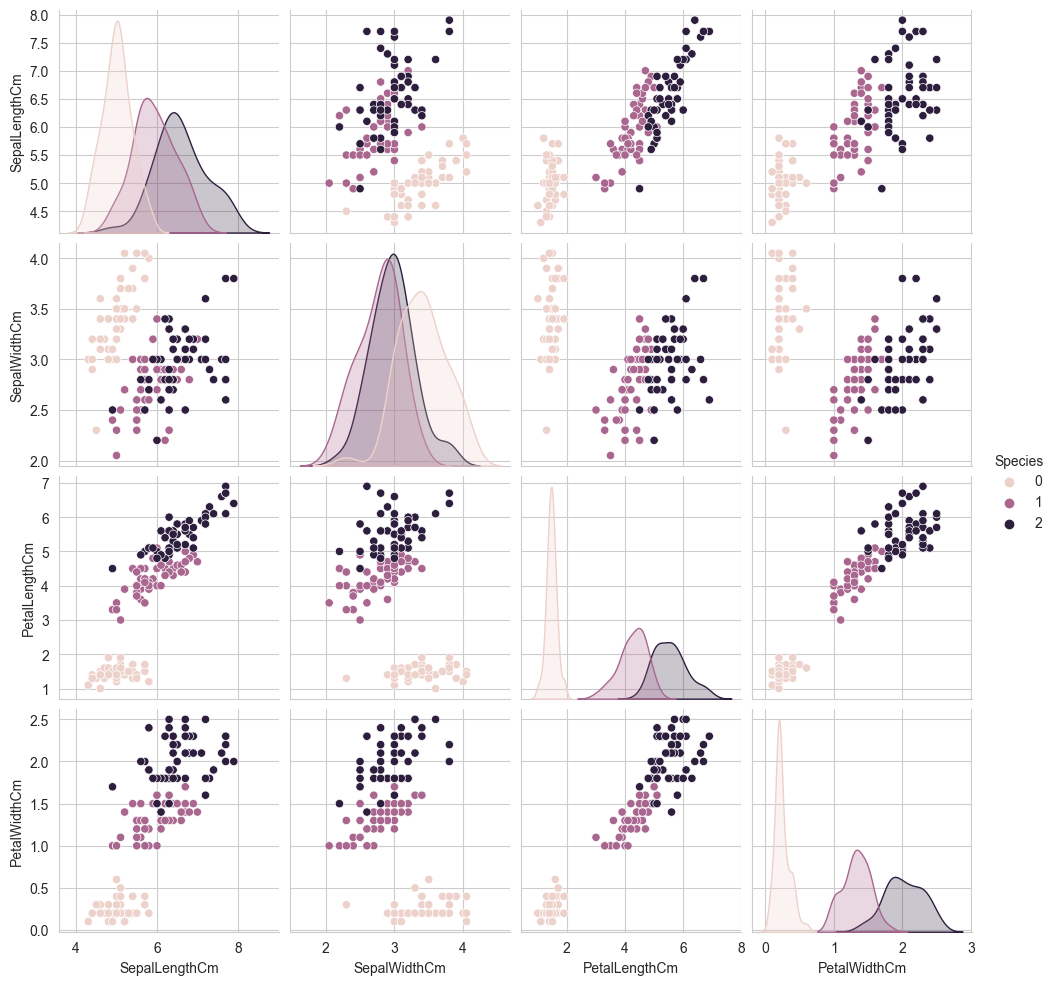

In [21]:
plt.figure(figsize=(16,9))
sns.pairplot(df,hue='Species')
plt.show()

# Decision Tree (Machine Learning Algorithm)

In [22]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [23]:
inputs=df.drop(['Species'],axis=1)
target=df['Species']

### Splitting the data into train & test.

In [24]:
X_train,X_test,y_train,y_test=train_test_split(inputs,target,train_size=0.8,random_state=35)

In [25]:
model=tree.DecisionTreeClassifier()

### Model Fitting.

In [26]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

### Model Prediction

In [27]:
y_pred=model.predict(X_test)

In [28]:
Accuracy=model.score(X_test,y_test)*100

In [29]:
round(Accuracy,2)

100.0

## Accuracy of this model is equal 100.0 %

In [30]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

